In [1]:
from glob import glob
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
file_list = glob('/nvme0/fwi-forecast/ECMWF_FWI_2019*_1200_hr_fwi.nc')

In [3]:
files = sorted(file_list, key=lambda x: int(x[-19:-17])*100 + int(x[-17:-15])); files

['/nvme0/fwi-forecast/ECMWF_FWI_20190401_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190402_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190403_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190404_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190405_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190406_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190407_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190408_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190409_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190410_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190411_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190412_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190413_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190414_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190415_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190416_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190417_1200_hr_fwi.nc',
 '/nvme0/fwi-f

In [4]:
len(files)

184

In [13]:
ds = xr.open_dataset(files[0])

In [14]:
ds

<xarray.Dataset>
Dimensions:  (lat: 2560, lon: 5120, time: 10)
Coordinates:
  * time     (time) datetime64[ns] 2019-04-01 2019-04-02 ... 2019-04-10
  * lon      (lon) float32 0.0 0.0703125 0.140625 ... 359.85938 359.9297
  * lat      (lat) float32 89.94619 89.87648 89.80636 ... -89.87648 -89.94619
Data variables:
    fwi      (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.8 (https://mpimet.m...
    Conventions:       CF-1.6
    history:           Wed Jun 03 12:15:04 2020: cdo --silent -select,name=fw...
    Reference date:    20190401
    ECMWF fire model:  3.0
    Lincense:          Copernicus
    version:           3.0
    NCO:               4.6.7
    CDO:               Climate Data Operators version 1.9.8 (https://mpimet.m...

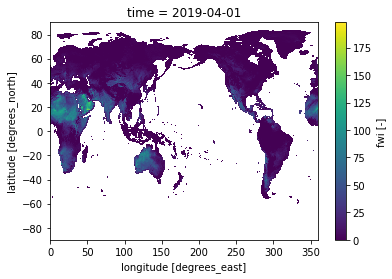

In [15]:
ds.fwi[0].plot()

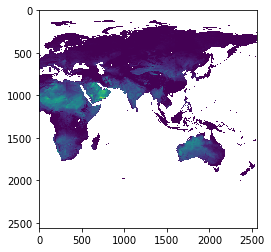

In [18]:
plt.imshow(ds.fwi[0].values[:, :2560])

In [19]:
ds.fwi[0].values.shape

(2560, 5120)

In [20]:
with xr.open_dataset(files[1]) as ds:
    inp = ds

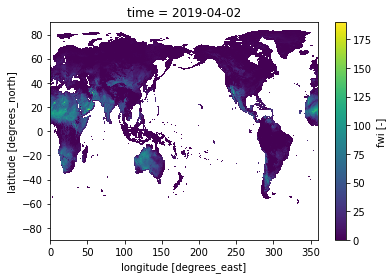

In [23]:
inp.fwi[0].plot()

In [4]:
full = xr.open_mfdataset(files, engine='h5netcdf')

/home/esowc/anaconda3/envs/wildfire-dl/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/esowc/anaconda3/envs/wildfire-dl/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [42]:
full

,Array,Chunk
Bytes,96.47 GB,524.29 MB
Shape,"(1840, 2560, 5120)","(10, 2560, 5120)"
Count,552 Tasks,184 Chunks
Type,float32,numpy.ndarray


In [5]:
std = full.std(skipna=True)

In [6]:
x = std.fwi.astype(np.float64, copy=False)

In [7]:
x.values

/home/esowc/anaconda3/envs/wildfire-dl/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/esowc/anaconda3/envs/wildfire-dl/lib/python3.7/site-packages/dask/array/reductions.py:643: RuntimeWarning: overflow encountered in square
  ns * inner_term ** order, axis=axis, **kwargs


array(inf)

In [9]:
full.fwi[:100].var(skipna=True).values

array(575.0773, dtype=float32)

In [13]:
full.fwi.astype(np.float64, copy=False)[:1000].var(skipna=True).values

array(695.85771408)

In [14]:
full.fwi.astype(np.float64, copy=False).var(skipna=True).values

array(2.45799744e+53)

In [15]:
full.fwi.astype(np.float64, copy=False).mean(skipna=True).values

array(6.34935063e+21)

In [16]:
full.fwi.astype(np.float64, copy=False).max(skipna=True).values

array(3.86973722e+31)

In [17]:
full.fwi.astype(np.float64, copy=False).min(skipna=True).values

array(-1.60626869e+28)

In [18]:
full.fwi.astype(np.float64, copy=False).max(skipna=True)

<xarray.DataArray 'fwi' ()>
dask.array<nanmax-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [31]:
full.fwi.astype(np.float64, copy=False)[1343:1344].max(skipna=True).values

array(3.86973722e+31)

In [41]:
full.fwi[1343].min(skipna=True).values

array(-1.6062687e+28, dtype=float32)

In [97]:
full.fwi[1343]

<xarray.DataArray 'fwi' (lat: 2560, lon: 5120)>
dask.array<getitem, shape=(2560, 5120), dtype=float32, chunksize=(2560, 5120), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 89.94619 89.87648 89.80636 ... -89.87648 -89.94619
  * lon      (lon) float32 0.0 0.0703125 0.140625 ... 359.85938 359.9297
    time     datetime64[ns] 2019-08-16
Attributes:
    units:    -
    title:    Fire Weather Index

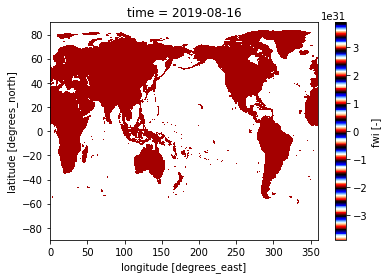

In [96]:
full.fwi[1343].plot(cmap='flag')

In [59]:
full.fwi[1343][1503:1505].max(skipna=True).values

array(3.8697372e+31, dtype=float32)

In [95]:
full.fwi[1343][1503][3400:4500].max(skipna=True).values

array(-1.0631502e+14, dtype=float32)

In [80]:
full.fwi[1343][1503][3400:5120].values.shape

(1720,)

In [81]:
full.fwi[1343][1503][3400:5120].values.reshape(40, -1).shape

(40, 43)

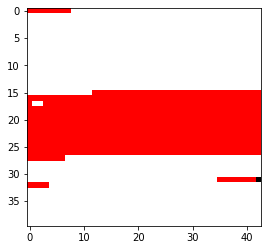

In [87]:
plt.imshow(full.fwi[1343][1503][3400:5120].values.reshape(40, -1), cmap='flag')

In [86]:
full.fwi[1343][1503][3403].values

array(-1.0631502e+14)

In [88]:
full.fwi[1343][1503][3400:5120].values.reshape(40, -1)[32, 0]

-1.28993226e-23

/home/esowc/anaconda3/envs/wildfire-dl/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/esowc/anaconda3/envs/wildfire-dl/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([528.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1.6062687e+28,  3.8552808e+30,  7.7266245e+30,  1.1597968e+31,
         1.5469311e+31,  1.9340655e+31,  2.3211997e+31,  2.7083343e+31,
         3.0954686e+31,  3.4826029e+31,  3.8697372e+31], dtype=float32),
 <a list of 10 Patch objects>)

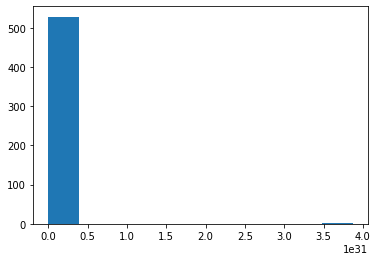

In [93]:
plt.hist(full.fwi[1343][1503][3400:5120].values)

In [92]:
full.fwi[1343][1503][3400:5120].max(skipna=True).values

array(3.8697372e+31, dtype=float32)

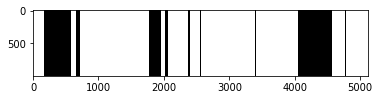

In [110]:
plt.imshow(np.broadcast_to(full.fwi[1343][1503].values[None, :], (999, 5120)), cmap='gray')

In [111]:
mod = xr.open_dataset('/nvme0/fwi-forecast/ECMWF_FWI_20190816_1200_hr_fwi.nc')

In [114]:
mod.fwi.max(skipna=True).values

array(303.4140625)

In [128]:
(~np.isnan(full.fwi[1343].values)).sum()

3311067

In [130]:
for i in range(10):
    print((mod.fwi[i].values == full.fwi[1343].values)[~np.isnan(full.fwi[1343].values)].sum())

0
0
3
0
1
5
0
0
0
1


In [120]:
full.fwi[1343].values

<xarray.DataArray 'fwi' (lat: 2560, lon: 5120)>
dask.array<getitem, shape=(2560, 5120), dtype=float32, chunksize=(2560, 5120), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 89.94619 89.87648 89.80636 ... -89.87648 -89.94619
  * lon      (lon) float32 0.0 0.0703125 0.140625 ... 359.85938 359.9297
    time     datetime64[ns] 2019-08-16
Attributes:
    units:    -
    title:    Fire Weather Index

In [138]:
mod.isel(time=slice(0,1))

<xarray.Dataset>
Dimensions:  (lat: 2560, lon: 5120, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2019-08-16
  * lon      (lon) float32 0.0 0.0703125 0.140625 ... 359.85938 359.9297
  * lat      (lat) float32 89.94619 89.87648 89.80636 ... -89.87648 -89.94619
Data variables:
    fwi      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:               Climate Data Interface version 1.9.8 (https://mpimet.m...
    Conventions:       CF-1.6
    history:           Thu Jun 04 21:39:17 2020: cdo --silent -select,name=fw...
    Reference date:    20190816
    ECMWF fire model:  3.0
    Lincense:          Copernicus
    version:           3.0
    NCO:               netCDF Operators version 4.7.8 (Homepage = http://nco....
    CDO:               Climate Data Operators version 1.9.8 (https://mpimet.m...

# Preprocessing

In [139]:
def preprocess(d):
    return d.isel(time=slice(0,1))

In [140]:
proc = xr.open_mfdataset(files, preprocess=preprocess, engine='h5netcdf')

/home/esowc/anaconda3/envs/wildfire-dl/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/esowc/anaconda3/envs/wildfire-dl/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [147]:
def stats(x):
    tmp = x.mean(skipna=True).values
    print('mean', tmp)
    print('mad', abs(x-tmp).mean(skipna=True).values)
    print('var', x.var(skipna=True).values)
    print('min', x.min(skipna=True).values)
    print('max', x.max(skipna=True).values)

In [148]:
stats(proc.fwi)

mean 18.389227
mad 20.80943
var 716.1736
min 1.72531e-09
max 438.3116
